In [17]:
from IPython.display import HTML

with open('./onedork.css', 'r') as file:
    custom_css = file.read()
    
custom_css = f'<style>{custom_css}</style>'
HTML(custom_css)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Libraries</p>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Intro</p>

>This analysis focuses on conducting a comprehensive exploratory data analysis (EDA) of the provided dataset. The goal is to inform decision-making and recommendations before entering the modeling phase. Through this EDA, we aim to uncover data patterns, relationships, and anomalies that could impact subsequent modeling. The insights gained will guide preprocessing steps to improve model performance.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Data</p>

In this case, it is a database of quality and price of zircons (precious stones)
<sub>
<details><summary>Variable Information</summary>

| Variable Name | Description |
|---------------|-------------|
| Carat         | Carat weight of the cubic zirconia. |
| Cut           | Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal. |
| Color         | Colour of the cubic zirconia. With D being the best and J the worst. |
| Clarity       | Cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3 = level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3 |
| Depth         | The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter. |
| Table         | The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter. |
| Price         | The Price of the cubic zirconia. |
| X             | Length of the cubic zirconia in mm. |
| Y             | Width of the cubic zirconia in mm. |
| Z             | Height of the cubic zirconia in mm. |

</details>
</sub>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Load Data</p>

In [3]:
df = pd.read_excel('../data/raw/diamonds.xlsx',sheet_name='Diamonds')
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Descriptive Statistics</p>

#### Dataframe missing value check.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB



#### Summary statistics of the numeric variables (mean, median, standard deviation, etc.).

In [5]:
df.describe().T.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01


#### Min - Max and Count

In [18]:
# Get top 5 value counts for each column in `df`.
counts = pd.Series({ft: [df[ft].value_counts().round(3).iloc[:5].to_dict()] for ft in df.columns}, name='Top 5')

# Extract min and max values for each numeric column.
min_max = df.describe().T[['min', 'max']]
# Merge the min, max, and top 5 value counts data.
stats_pivot = pd.concat([min_max, counts], axis=1)
stats_pivot.style.background_gradient()

,min,max,Top 5
carat,0.200000,5.010000,"[{0.3: 2604, 0.31: 2249, 1.01: 2242, 0.7: 1981, 0.32: 1840}]"
depth,43.000000,79.000000,"[{62.0: 2239, 61.9: 2163, 61.8: 2077, 62.2: 2039, 62.1: 2020}]"
table,43.000000,95.000000,"[{56.0: 9881, 57.0: 9724, 58.0: 8369, 59.0: 6572, 55.0: 6268}]"
price,326.000000,18823.000000,"[{605: 132, 802: 127, 625: 126, 828: 125, 776: 124}]"
x,0.000000,10.740000,"[{4.37: 448, 4.34: 437, 4.33: 429, 4.38: 428, 4.32: 425}]"
y,0.000000,58.900000,"[{4.34: 437, 4.37: 435, 4.35: 425, 4.33: 421, 4.32: 414}]"
z,0.000000,31.800000,"[{2.7: 767, 2.69: 748, 2.71: 738, 2.68: 730, 2.72: 697}]"
cut,nan,nan,"[{'Ideal': 21551, 'Premium': 13791, 'Very Good': 12082, 'Good': 4906, 'Fair': 1610}]"
color,nan,nan,"[{'G': 11292, 'E': 9797, 'F': 9542, 'H': 8304, 'D': 6775}]"
clarity,nan,nan,"[{'SI1': 13065, 'VS2': 12258, 'SI2': 9194, 'VS1': 8171, 'VVS2': 5066}]"


#### 4Cs of Diamond Quality (Cut, Color, Clarity, Carat)

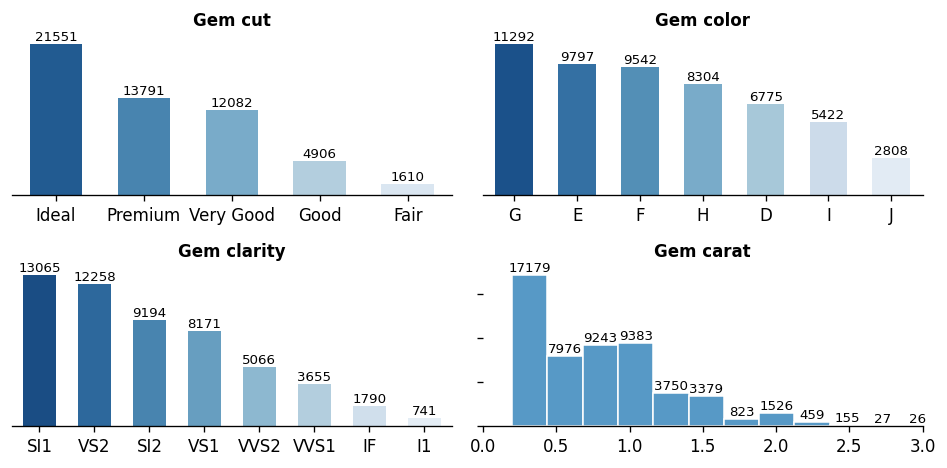

In [19]:
# List of categorical variables
categories = ['cut', 'color', 'clarity']

# Create subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(8, 4), dpi=120)
ax = ax.ravel()

# Iterate through categories and create count plots
for i, category in enumerate(categories):
    # Create a count plot for the current category
    s = sns.countplot(data=df, x=category, order=df[category].value_counts().index, palette='Blues_r', width=0.6, ax=ax[i])
    
    # Set title, labels, and styling for the count plot
    ax[i].set_title(f'Gem {category}', ha='center', fontweight='bold', fontsize=10)
    ax[i].set_yticks([])
    for container in s.containers:
        s.bar_label(container, c='black', size=8)
        s.set_ylabel('')
        s.spines['top'].set_visible(False)
        s.set_xlabel('')
        s.spines['right'].set_visible(False)
        s.spines['left'].set_visible(False)
        plt.tick_params(labelleft=False)

# Create a histogram for the 'carat' variable
s = sns.histplot(data=df, x='carat', bins=20, ax=ax[3], edgecolor='white')
ax[3].set_title(f'Gem carat', ha='center', fontweight='bold', fontsize=10)
for container in s.containers:
    s.bar_label(container, c='black', size=8)
    s.set_ylabel('')
    s.spines['top'].set_visible(False)
    s.set_xlabel('')
    s.spines['right'].set_visible(False)
    s.spines['left'].set_visible(False)
    plt.tick_params(labelleft=False)
ax[3].set_xlim(0, 3)

# Adjust layout
fig.tight_layout()

**Findings:**

* A significant proportion of cubic zirconia gems in the dataset weigh less than 1 carat.
* The dataset is dominated by cubic zirconia gems that exhibit a colorless or nearly colorless appearance.
* Cubic zirconia gems with an Ideal or Premium cut are widely represented in the dataset.
* The most prevalent clarity grades among the cubic zirconia gems in the dataset are SI1, VS1, and VS2. This suggests that the gems in the dataset are generally of high quality.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Data visualization</p>

### Price distribution

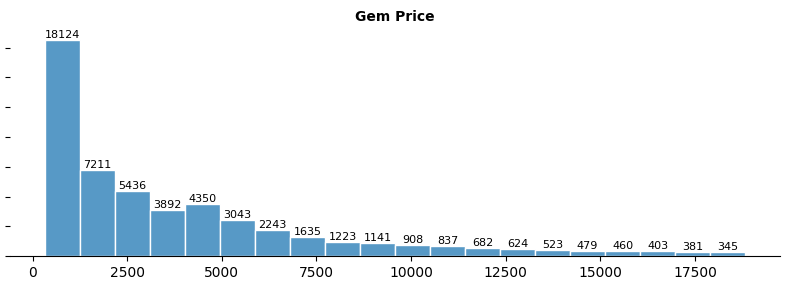

In [20]:
# Create a single subplot
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

# Create a histogram for the 'price' variable
s = sns.histplot(data=df, x='price', bins=20, ax=ax, edgecolor='white')
ax.set_title(f'Gem Price', ha='center', fontweight='bold', fontsize=10)
for container in s.containers:
    s.bar_label(container, c='black', size=8)
    s.set_ylabel('')
    s.spines['top'].set_visible(False)
    s.set_xlabel('')
    s.spines['right'].set_visible(False)
    s.spines['left'].set_visible(False)
    plt.tick_params(labelleft=False)

# Adjust layout
fig.tight_layout()

In [9]:
pd.crosstab(df.color, df.clarity).style.background_gradient(cmap='Blues')

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
color,,,,,,,,
D,42,73,2083,1370,705,1697,252,553
E,102,158,2426,1713,1281,2470,656,991
F,143,385,2131,1609,1364,2201,734,975
G,150,681,1976,1548,2148,2347,999,1443
H,162,299,2275,1563,1169,1643,585,608
I,92,143,1424,912,962,1169,355,365
J,50,51,750,479,542,731,74,131


In [10]:
pd.crosstab(df.color, df.cut).style.background_gradient(cmap='Blues')

cut,Fair,Good,Ideal,Premium,Very Good
color,,,,,
D,163,662,2834,1603,1513
E,224,933,3903,2337,2400
F,312,909,3826,2331,2164
G,314,871,4884,2924,2299
H,303,702,3115,2360,1824
I,175,522,2093,1428,1204
J,119,307,896,808,678


In [11]:
pd.crosstab(df.clarity, df.cut).style.background_gradient(cmap='Blues')

cut,Fair,Good,Ideal,Premium,Very Good
clarity,,,,,
I1,210,96,146,205,84
IF,9,71,1212,230,268
SI1,408,1560,4282,3575,3240
SI2,466,1081,2598,2949,2100
VS1,170,648,3589,1989,1775
VS2,261,978,5071,3357,2591
VVS1,17,186,2047,616,789
VVS2,69,286,2606,870,1235


**Observations:**
* The majority of gems in the database are priced below $2500.
* The color J is the least represented in the database, while the colors E, F, and G are the most prevalent, with notable relationships to clarity and cut.
* There is no discernible pattern between clarity and cut.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Correlations</p>

Calculate the correlation matrix and visualize a heatmap.

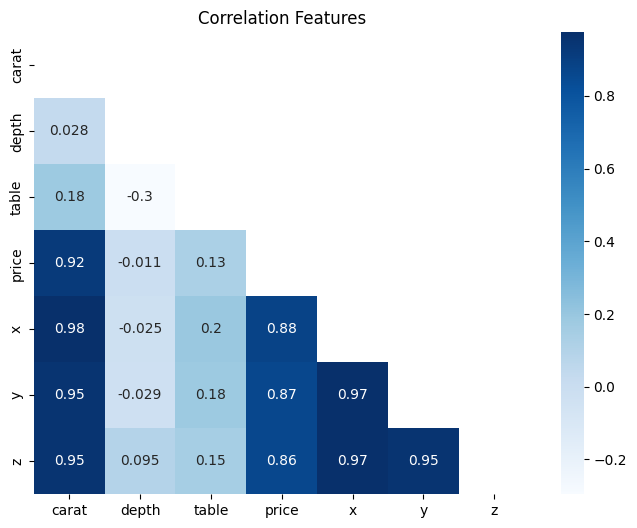

In [21]:
# Select numeric columns from the dataframe
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a figure and plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', mask=mask)
plt.title('Correlation Features')
plt.show()

**Observations:**

* Size-related variables exhibit a strong positive correlation with the gem's price.
* The variables "table" and "depth" show weak correlations with both the price and other variables.
* High correlation among different size measurements indicates the shape of the gem.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Outlier and Anomaly Analysis</p>

Generate box plots for the numeric variables and identify potential outlier values.

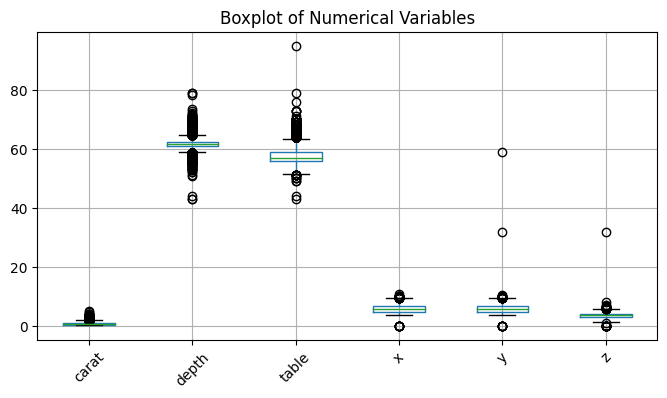

In [22]:
# Create a figure with a specified size
plt.figure(figsize=(8, 4))

# Create a boxplot for selected numerical variables
df[['carat', 'depth', 'table', 'x', 'y', 'z']].boxplot()

# Set title and rotate x-axis labels for better visibility
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)

# Display the plot
plt.show()

**Observations:**

* All features exhibit low variability.
* The "depth" and "table" variables have a high number of outliers; however, it is not advisable to correct them as these could correspond to rare gems that might exist.
* The outliers of the "carat," "x," "y," and "z" variables are very close to the interquartile range.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Relationships Between Variables</p>

Create scatter plots to examine relationships between numeric variables.

#### Size Features

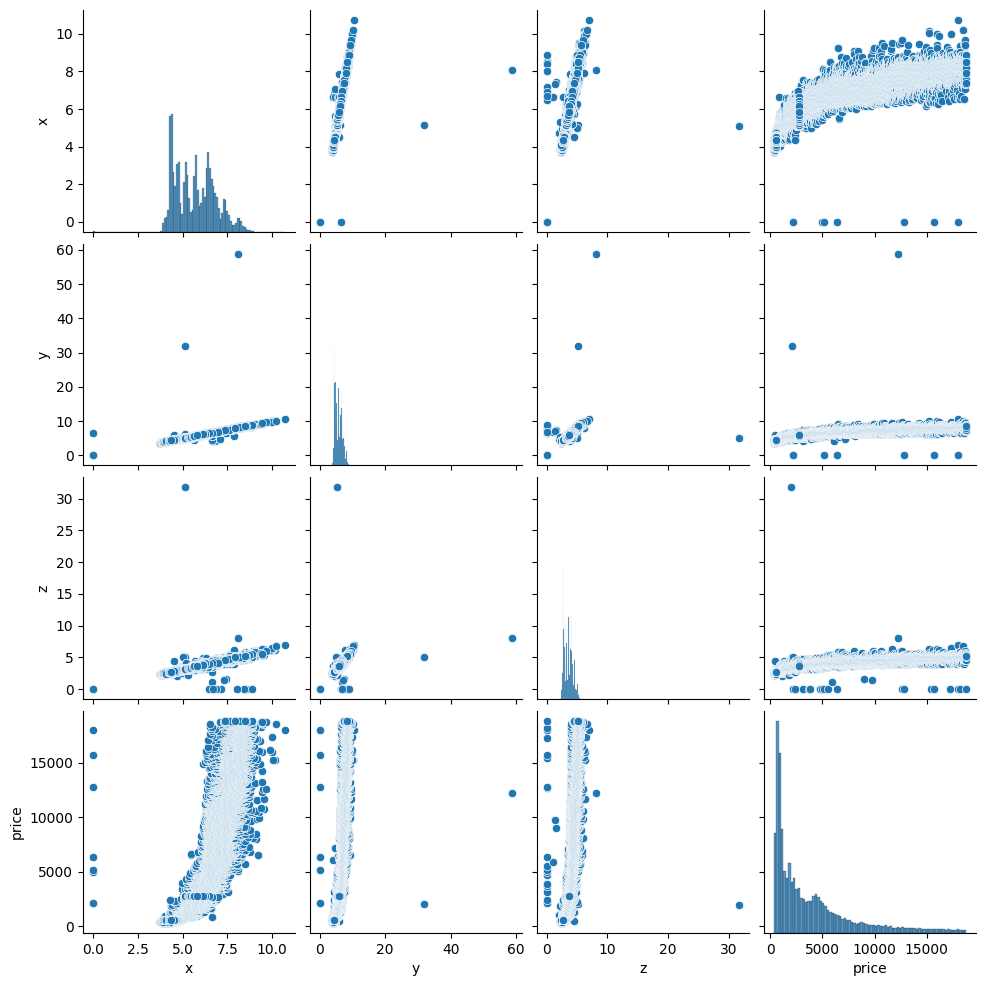

In [16]:
# Create a pair plot for size variables
s = sns.pairplot(df[['x', 'y', 'z', 'price']])
plt.show()

#### Propierties

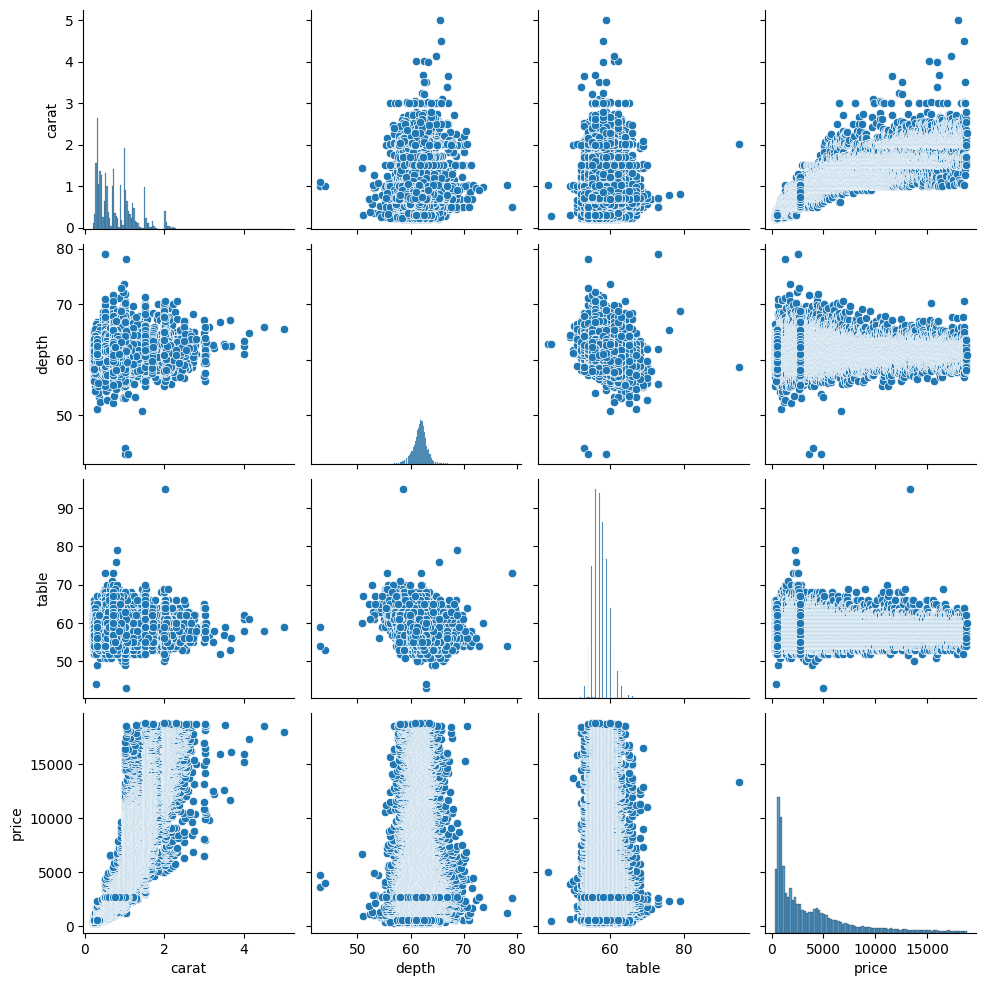

In [15]:
# Create a pair plot for selected variables
s = sns.pairplot(df[['carat', 'depth', 'table', 'price']])
plt.show()

**Observations:**

* The relationships between the size variables x, y, and z are pseudo-linear among themselves.
* The size variables x, y, and z show low variability with respect to the price.
* The depth and table variables exhibit high variability with respect to the price and are unrelated to each other.
* The carat variable displays high variability with respect to the price; however, it also shows some linear trend with the price for certain points.


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Key Insights from Exploratory Data Analysis</p>

The exploratory analysis of the dataset yielded the following key insights:

1. **Size and Characteristics:**
   - Gemstones with weights under 1 carat constitute the majority.
   - Gemstones of color J are underrepresented, while E, F, and G colors dominate.
   - Pseudo-linear correlations exist among size variables (x, y, z).

2. **Price and Features:**
   - Size-related attributes are positively correlated with gemstone prices.
   - 'Depth' and 'table' features show weak correlations with price.
   - 'Carat' demonstrates significant variability in relation to price.

3. **Outliers and Variability:**
   - Numeric attributes generally display low variability.
   - 'Depth' and 'table' exhibit pronounced outliers, likely indicating unique gemstones.
   - 'Carat', 'x', 'y', and 'z' outliers cluster near the interquartile range.

4. **Category Imbalance:**
   - Imbalanced dataset observed for the 'cut' feature.
   - Dominance of the 'Ideal' label, with limited representation for 'Good' and 'Fair'.

5. **Data Visualization:**
   - Utilized various visualizations, including bar plots and box plots, to explore data relationships and distributions.

These insights collectively provide a deeper understanding of the dataset's composition and the unique attributes of gemstones. These findings underscore the need for further analysis and modeling considerations.
